#Python - Non-technical introduction

##Final Exercise "Scoring Model"

This file provides you guidance for developing your own customer scoring model. The task is structured in XXX tasks that build-up on each other. We will provide intermediary solutions a long the way.

*Note:* If you want to make changes to this document, you need to save your own copy using the "Save copy in Drive" command in the "File" menu.

###Exercise 1: Preparation

Before we start, let's do some **preparations** required for subsequent exercises.

1.   Load the following packages: numpy, pandas, matplotlib, seaborn.
2.   Load the data transactonal data using `read_csv()`. You can find the file here: [https://raw.githubusercontent.com/bachmannpatrick/Python-Class/master/data/transactions.csv"](https://raw.githubusercontent.com/bachmannpatrick/Python-Class/master/data/transactions.csv")
3.   Transpose the variable `TransDate` to datetime  with pandas `to_datetime()`.




In [507]:
# 1.
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

# 2. Read the csv file and store it in the variable "myData". Note: this file is hostes in a GitHub repository.
myData=pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/bachmannpatrick/Python-Class/master/data/transactions.csv", sep=",")

# 3. Adjust the format of column "TransDate" to datetime
#Adjust the format of column "TransDate" to datetime
us_date_format = "%Y-%m-%d"  # JoinDate, e.g., 1969-09-06
eu_date_format = "%d.%m.%Y"  # TransDate and Birthdate, e.g., 04.05.1987
myData["TransDate"] = pd.to_datetime(
    myData["TransDate"], format=eu_date_format, dayfirst=True)


In [508]:
myData

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID
0,149332,2005-11-15,1,199.95,107.00,127998739
1,172951,2008-08-29,1,199.95,108.00,128888288
2,120621,2007-10-19,1,99.95,49.00,125375247
3,149236,2005-11-14,1,39.95,18.95,127996226
4,149236,2007-06-12,1,79.95,35.00,128670302
...,...,...,...,...,...,...
223186,199997,2012-09-17,1,29.95,13.80,132481149
223187,199997,2012-09-17,1,29.95,13.80,132481149
223188,199998,2012-09-17,1,29.95,13.80,132481154
223189,199999,2012-09-17,1,179.95,109.99,132481165


In [509]:
# probably has nans

###Exercise 2: Aggregation of variables

1. Save the date of the overall latest transaction in a variable called `max_Date`.


In [510]:
max_Date = max(myData["TransDate"])

In [511]:
max_Date

Timestamp('2012-12-09 00:00:00')

2.  Create a new `pandas.DataFrame` called `rfm` that includes the customer ID, as well as the measures for purchase recency, frequency, and monetary value *Hint 1:* `.dt.days` allows to convert datetime differences into integer. *Hint 2:* use aggregation.

In [512]:
import datetime as dt

In [513]:
rfm=myData.groupby("Customer").agg(
    Recency = ("TransDate","max"),
    Frequency =("TransID","count"),
    Monetary = ("PurchAmount", "mean")
).reset_index()

In [514]:
# Recency: difference in days between the latest purchase and today
#myData["TodayDate"] = max_Date
#myData["TodayDate"] = pd.Series([max_Date for x in range(len(myData.index))])
#latest_purchase = myData.groupby("Customer").agg(LatestPurchDate=("TransDate", "max")).reset_index()
#myData = myData.merge(latest_purchase, on='Customer', how='left')
#myData["Recency"] = -(
 #   myData["LatestPurchDate"] - myData["TodayDate"]).dt.days

# Frequency: number of transactions
#myData["Frequency"] = myData.groupby("Customer")["Customer"].transform("count")

# Monetary value: average amount spent per transaction
#monetary = myData.groupby("Customer").agg(Monetary=("PurchAmount", "mean")).reset_index()
#myData = myData.merge(monetary, on='Customer', how='left')



In [515]:
rfm["Recency"] = (max_Date-rfm["Recency"]).dt.days

In [516]:
myData

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID
0,149332,2005-11-15,1,199.95,107.00,127998739
1,172951,2008-08-29,1,199.95,108.00,128888288
2,120621,2007-10-19,1,99.95,49.00,125375247
3,149236,2005-11-14,1,39.95,18.95,127996226
4,149236,2007-06-12,1,79.95,35.00,128670302
...,...,...,...,...,...,...
223186,199997,2012-09-17,1,29.95,13.80,132481149
223187,199997,2012-09-17,1,29.95,13.80,132481149
223188,199998,2012-09-17,1,29.95,13.80,132481154
223189,199999,2012-09-17,1,179.95,109.99,132481165


In [517]:
#rfm = pd.DataFrame()

#rfm["Customer"] = myData["Customer"]
#rfm["LatestPurchDate"] = myData["LatestPurchDate"]
#rfm["Recency"] = myData["Recency"]
#rfm["Frequency"] = myData["Frequency"]
#rfm["Monetary"] = myData["Monetary"]


In [518]:
rfm

,Customer,Recency,Frequency,Monetary
0,100001,473,2,139.95
1,100002,2902,1,499.95
2,100003,321,2,189.95
3,100004,126,1,499.95
4,100005,721,4,77.45
...,...,...,...,...
98775,199995,83,3,29.95
98776,199996,83,1,179.95
98777,199997,83,6,29.95
98778,199998,83,1,29.95


3. Check the structure of the new table and ensure that all the variables are numeric.

In [519]:
rfm.dtypes

Customer       int64
Recency        int64
Frequency      int64
Monetary     float64
dtype: object

###Exercise 3: Descriptive statistics

1. Get a first impression of the distribution of RFM measures by taking a look at the `describe(`) function of `pandas.DataFrame`.

In [520]:
rfm.describe()

,Customer,Recency,Frequency,Monetary
count,98780.000000,98780.000000,98780.000000,98780.000000
mean,150163.054576,1358.236212,2.259476,89.211307
std,28804.251796,764.578354,2.662274,94.562400
min,100001.000000,0.000000,1.000000,0.000000
25%,125333.750000,720.000000,1.000000,44.737500
50%,150194.500000,1368.000000,1.000000,64.950000
75%,175108.250000,1954.000000,2.000000,99.950000
max,199999.000000,2902.000000,92.000000,5000.000000


2. Use matplotlib.pyplot in order to plot histograms for all the three measures and arrange them in one single picture.
3. Adjust the title, labels, axes limits, and colors of your plots in an appealing way

Text(0.5, 1.0, 'Histogram of Monetary')

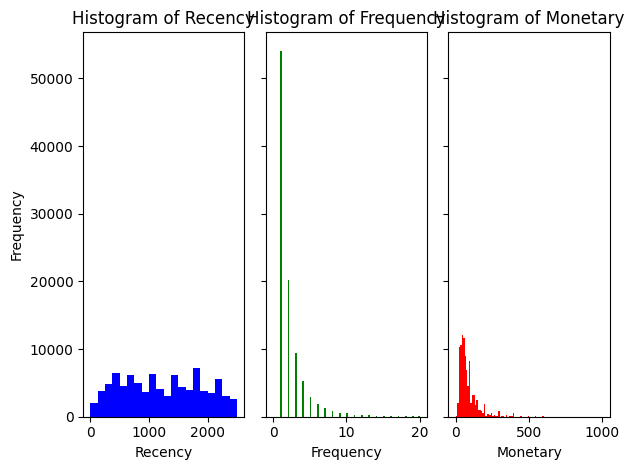

In [521]:
N_points = rfm.shape[0]
n_bins = 20 # 20 100 100 

min_diff, max_diff = 0, 2500 
min_trans, max_trans = 0, 20
min_avg, max_avg = 0, 1000 


fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=False)

# Plot the histograms with individual min and max values
axs[0].hist(rfm["Recency"],
            bins=n_bins, range=(min_diff, max_diff), color='b')
axs[1].hist(rfm["Frequency"], bins=100, range=(min_trans, max_trans), color='g')
axs[2].hist(rfm["Monetary"], bins=100, range=(min_avg, max_avg), color='r')

# Set labels and titles
axs[0].set_xlabel('Recency')
axs[1].set_xlabel('Frequency')
axs[2].set_xlabel('Monetary')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Recency')
axs[1].set_title('Histogram of Frequency')
axs[2].set_title('Histogram of Monetary')

####**Slide:** Remark: pandas.cut()function
---



In [522]:
temp=[1,1,1,3,4,7,8,9,10,10]

temp_factor = pd.cut(temp, bins=2, labels=["1", "2"])
print(temp_factor)

['1', '1', '1', '1', '1', '2', '2', '2', '2', '2']
Categories (2, object): ['1' < '2']


In [523]:
# Alternative
temp_factor = pd.cut(temp, bins=[0,5,10], labels=["1","2"])
print(temp_factor)

['1', '1', '1', '1', '1', '2', '2', '2', '2', '2']
Categories (2, object): ['1' < '2']


###Exercise 4: Calculation of RFM scores

1. Use the pandas.cut()command to transform the a) recency, b) frequency, and
c) monetary value measure into scores on a scale from 1 to 3 (develop meaningful category splits. Be aware, that the recency score is decreasing in the days since last purchase!


In [524]:
# recency
# Define binning levels
bins_rec = [-0.1, 1000, 2000, max(rfm["Recency"])]
rfm["Recency"] = pd.cut(rfm["Recency"], bins=bins_rec, labels=["3", "2", "1"])
rfm["Recency"] = rfm["Recency"].cat.codes + 1

In [525]:
# frequency
bins_freq=[-0.1,1,3,max(rfm["Frequency"])]
rfm["Frequency"] = pd.cut(
    rfm["Frequency"], bins=bins_freq, labels=["1", "2", "3"])
rfm["Frequency"] = rfm["Frequency"].cat.codes + 1



In [526]:
# monetary value
bins_mon=[-0.1,50,100,max(rfm["Monetary"])]
rfm["Monetary"] = pd.cut(rfm["Monetary"], bins=bins_mon, labels=["1", "2", "3"])
rfm["Monetary"] = rfm["Monetary"].cat.codes + 1


In [527]:
# Display the dataframe
print(rfm)

       Customer  Recency  Frequency  Monetary
0        100001        1          2         3
1        100002        3          1         3
2        100003        1          2         3
3        100004        1          1         3
4        100005        1          3         2
...         ...      ...        ...       ...
98775    199995        1          2         1
98776    199996        1          1         3
98777    199997        1          3         1
98778    199998        1          1         1
98779    199999        1          1         3

[98780 rows x 4 columns]


2. Use matplotlib again to plot histograms for all the three scores and arrange them in one single picture. Do you notice something particular?


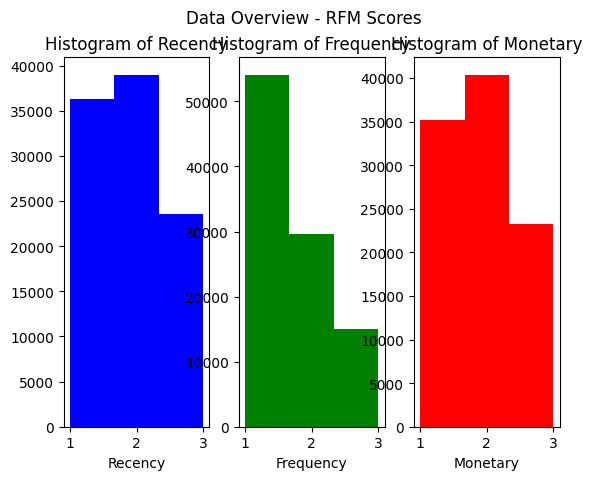

In [528]:
plt.suptitle("Data Overview - RFM Scores")

# Recency score
plt.subplot(1,3,1)
plt.hist(rfm["Recency"], bins=3, color='b')
plt.xlabel('Recency')
plt.title('Histogram of Recency')

# Frequency score
plt.subplot(1,3,2)
plt.hist(rfm["Frequency"], bins=3, color='g')
plt.xlabel('Frequency')
plt.title('Histogram of Frequency')


# Monetary value score
plt.subplot(1,3,3)
plt.hist(rfm["Monetary"], bins=3, color='r')
plt.xlabel('Monetary')
plt.title('Histogram of Monetary')


plt.show()

###Exercise 5: The overall RFM score

1.Calculate the unweighted RFM score.

In [529]:
rfm["unweighted"]= (1/3)*(rfm["Recency"] + rfm["Frequency"] + rfm["Monetary"])

print(rfm)

       Customer  Recency  Frequency  Monetary  unweighted
0        100001        1          2         3    2.000000
1        100002        3          1         3    2.333333
2        100003        1          2         3    2.000000
3        100004        1          1         3    1.666667
4        100005        1          3         2    2.000000
...         ...      ...        ...       ...         ...
98775    199995        1          2         1    1.333333
98776    199996        1          1         3    1.666667
98777    199997        1          3         1    1.666667
98778    199998        1          1         1    1.000000
98779    199999        1          1         3    1.666667

[98780 rows x 5 columns]


2. Calculate two weighted RFM scores with the following weights: 20-60-20, 60-20-20.

In [530]:
rfm["weighted1"]= 0.2*rfm["Recency"] + 0.6*rfm["Frequency"] + 0.2*rfm["Monetary"]
rfm["weighted2"]= 0.6*rfm["Recency"] + 0.2*rfm["Frequency"] + 0.2*rfm["Monetary"]
print(rfm)

       Customer  Recency  Frequency  Monetary  unweighted  weighted1  \
0        100001        1          2         3    2.000000        2.0   
1        100002        3          1         3    2.333333        1.8   
2        100003        1          2         3    2.000000        2.0   
3        100004        1          1         3    1.666667        1.4   
4        100005        1          3         2    2.000000        2.4   
...         ...      ...        ...       ...         ...        ...   
98775    199995        1          2         1    1.333333        1.6   
98776    199996        1          1         3    1.666667        1.4   
98777    199997        1          3         1    1.666667        2.2   
98778    199998        1          1         1    1.000000        1.0   
98779    199999        1          1         3    1.666667        1.4   

       weighted2  
0            1.6  
1            2.6  
2            1.6  
3            1.4  
4            1.6  
...          ...  
98

3. Divide all customers into three RFM groups by rounding the unweighted RFM score to the nearest whole number. Hint: Use the function *round* for rounding.

In [531]:
#rfm["group_unweighted"]=pd.cut(
#    rfm["unweighted"], bins=3, labels=["1", "2", "3"])
rfm["group_unweighted"] = round(rfm["unweighted"])
rfm["group_weighted1"] = round(rfm["weighted1"])
rfm["group_weighted2"] = round(rfm["weighted2"])
print(rfm)

       Customer  Recency  Frequency  Monetary  unweighted  weighted1  \
0        100001        1          2         3    2.000000        2.0   
1        100002        3          1         3    2.333333        1.8   
2        100003        1          2         3    2.000000        2.0   
3        100004        1          1         3    1.666667        1.4   
4        100005        1          3         2    2.000000        2.4   
...         ...      ...        ...       ...         ...        ...   
98775    199995        1          2         1    1.333333        1.6   
98776    199996        1          1         3    1.666667        1.4   
98777    199997        1          3         1    1.666667        2.2   
98778    199998        1          1         1    1.000000        1.0   
98779    199999        1          1         3    1.666667        1.4   

       weighted2  group_unweighted  group_weighted1  group_weighted2  
0            1.6               2.0              2.0             

4. Display all customers with the highest achievable rating.

In [532]:
rfm.loc[rfm['group_unweighted'] == 3]

,Customer,Recency,Frequency,Monetary,unweighted,weighted1,weighted2,group_unweighted,group_weighted1,group_weighted2
33,100034,3,3,2,2.666667,2.8,2.8,3.0,3.0,3.0
38,100039,3,2,3,2.666667,2.4,2.8,3.0,2.0,3.0
54,100056,3,3,2,2.666667,2.8,2.8,3.0,3.0,3.0
58,100060,3,2,3,2.666667,2.4,2.8,3.0,2.0,3.0
64,100066,3,2,3,2.666667,2.4,2.8,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
88973,190092,2,3,3,2.666667,2.8,2.4,3.0,3.0,2.0
89125,190246,2,3,3,2.666667,2.8,2.4,3.0,3.0,2.0
89188,190310,2,3,3,2.666667,2.8,2.4,3.0,3.0,2.0
89213,190335,2,3,3,2.666667,2.8,2.4,3.0,3.0,2.0


### Exercise 6: The RFM function

1. Write a function that automates the estimation of the RFM score. **Function input:** pandas.DataFrame as well as the weight for recency, frequency, and monetary value. **Output table:** Customer ID, single RFM scores, overall score, and the RFM group.

2. Ensure that the final RFM score is between 1 and 3 even if the weights do not add up to one.

Hint: Please do not change the values of the bins.

In [537]:
def calculateRFMscores(data, weight_recency=1, weight_frequency=1, weight_monetary=1):

    # Ensure that the weights add up to one
    weight_recency2 = weight_recency/sum([weight_recency, weight_frequency, weight_monetary])
    weight_frequency2 = weight_frequency/sum([weight_recency, weight_frequency, weight_monetary])
    weight_monetary2 = weight_monetary/sum([weight_recency, weight_frequency, weight_monetary])

    # RFM measures
    rfm = data.copy()
    rfm["Recency"] = (pd.to_datetime("2023-09-01") -
                      pd.to_datetime(rfm["TransDate"])).dt.days
    rfm["Frequency"] = rfm["TransID"]
    rfm["Monetary"] = rfm["PurchAmount"]

    # RFM scores
    #recency
    bins_rec = [-0.1, 1000, 2000, max(rfm["Recency"])]
    rfm["R_Score"] = pd.cut(rfm["Recency"], bins=bins_rec, labels=[3, 2, 1])

    #frequency
    bins_freq=[-0.1,1,3,max(rfm["Frequency"])]
    rfm["F_Score"] = pd.cut(rfm["Frequency"], bins=bins_freq, labels=[1, 2, 3])

    #monetary
    bins_mon=[-0.1,50,100,max(rfm["Monetary"])]
    rfm["M_Score"] = pd.cut(rfm["Monetary"], bins=bins_mon, labels=[1, 2, 3])

    # Overall weighted RFM score
    rfm["finalscore"] = (
        (rfm["R_Score"].astype(int) * weight_recency2) +
        (rfm["F_Score"].astype(int) * weight_frequency2) +
        (rfm["M_Score"].astype(int) * weight_monetary2)
    )

    # RFM group
    rfm["group"]=round(rfm["finalscore"])

    return rfm

In [538]:
myData

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID
0,149332,2005-11-15,1,199.95,107.00,127998739
1,172951,2008-08-29,1,199.95,108.00,128888288
2,120621,2007-10-19,1,99.95,49.00,125375247
3,149236,2005-11-14,1,39.95,18.95,127996226
4,149236,2007-06-12,1,79.95,35.00,128670302
...,...,...,...,...,...,...
223186,199997,2012-09-17,1,29.95,13.80,132481149
223187,199997,2012-09-17,1,29.95,13.80,132481149
223188,199998,2012-09-17,1,29.95,13.80,132481154
223189,199999,2012-09-17,1,179.95,109.99,132481165


In [539]:
calculateRFMscores(myData,60,20,20)

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,finalscore,group
0,149332,2005-11-15,1,199.95,107.00,127998739,6499,127998739,199.95,1,3,3,1.8,2.0
1,172951,2008-08-29,1,199.95,108.00,128888288,5481,128888288,199.95,1,3,3,1.8,2.0
2,120621,2007-10-19,1,99.95,49.00,125375247,5796,125375247,99.95,1,3,2,1.6,2.0
3,149236,2005-11-14,1,39.95,18.95,127996226,6500,127996226,39.95,1,3,1,1.4,1.0
4,149236,2007-06-12,1,79.95,35.00,128670302,5925,128670302,79.95,1,3,2,1.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223186,199997,2012-09-17,1,29.95,13.80,132481149,4001,132481149,29.95,1,3,1,1.4,1.0
223187,199997,2012-09-17,1,29.95,13.80,132481149,4001,132481149,29.95,1,3,1,1.4,1.0
223188,199998,2012-09-17,1,29.95,13.80,132481154,4001,132481154,29.95,1,3,1,1.4,1.0
223189,199999,2012-09-17,1,179.95,109.99,132481165,4001,132481165,179.95,1,3,3,1.8,2.0


### 7. Kaggle Competition: Identify the weights used in the training data



1. Read in training data. Hint: You first need to upload the training data to google colab. To do this click on the folder button to the right and then on upload.



In [540]:
# RFM scores in the training data
rfm_training = pd.read_csv("training_data.csv")
rfm_training

,Customer,Recency,Frequency,Monetary,scoreTraining
0,100001,1,2,3,2.07418
1,100002,3,1,3,2.08660
2,100003,1,2,3,2.07418
3,100004,1,1,3,1.61748
4,100005,1,3,2,2.22214
...,...,...,...,...,...
98775,199995,1,2,1,1.45670
98776,199996,1,1,3,1.61748
98777,199997,1,3,1,1.91340
98778,199998,1,1,1,1.00000



2. Define a set of candidate weights. Hint: Create much more candidate weights than in the code example below.



In [541]:
candidate_weights = [
    [0.4, 0.2, 0.7],
    [0.2, 0.2, 0.6]
]

3. Compute the RFM scores on the transactions data, using the weights defined. Then compute the mean absolute error between the rfm scores in the transactions data and the rfm scores in the training data.
Hint: Merge the two dataframes by Customer, to make sure you are comparing the scores of the same customer.

Simple code: feasible only with few candidate weights. Its purpose is more to illustrate the idea of what needs to be done

In [542]:
# Calculate rfm score using the first set of candidate weights
rfm0 = calculateRFMscores(myData, weights = candidate_weights[0])
# Merge with the training data by customer
data_tmp = rfm_training.merge(rfm0, how='inner', on='Customer')
# Calculate the score difference
score_difference0 = np.mean(np.abs(data_tmp['finalscore'] - data_tmp['score']))
print(score_difference0)

# Calculate rfm score using the second set of candidate weights
rfm1 = calculateRFMscores(myData, weights = candidate_weights[1])
# Merge with the training data by customer
data_tmp = rfm_training.merge(rfm1, how='inner', on='Customer')
# Calculate the score difference
score_difference1 = np.mean(np.abs(data_tmp['finalscore'] - data_tmp['score']))
print(score_difference1)


TypeError: calculateRFMscores() got an unexpected keyword argument 'weights'

Proper code: works with larger set of weights.

In [ ]:
# Initialize variables to store the best weights and the smallest score difference
best_weights = None
smallest_score_difference = float('inf')

# Evaluate RFM function on multiple sets of weights and compute score differences
for weights in candidate_weights:
  ***** YOUR CODE GOES HERE *****************

# Print the best weights and smallest score difference
print("Best weights:", best_weights)
print("Smallest score difference:", smallest_score_difference)

4. Save the weights with the smallest score difference and submit them to kaggle. Hint: After you wrote the data to csv, download it to your computer and then submit it to kaggle. To download the data, go again to the folder button on the right.

In [ ]:
# Create list with 1 (for id) and the weights
data=[1]
data.extend(best_weights)

# Create dataframe from the list with the correct column names
submissionData = pd.DataFrame([data],  columns=["id","weight_recency", "weight_frequency", "weight_monetary"])

# Save data
submissionData.to_csv("kaggle_submission.csv", index=None)

In [553]:
myData

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID
0,149332,2005-11-15,1,199.95,107.00,127998739
1,172951,2008-08-29,1,199.95,108.00,128888288
2,120621,2007-10-19,1,99.95,49.00,125375247
3,149236,2005-11-14,1,39.95,18.95,127996226
4,149236,2007-06-12,1,79.95,35.00,128670302
...,...,...,...,...,...,...
223186,199997,2012-09-17,1,29.95,13.80,132481149
223187,199997,2012-09-17,1,29.95,13.80,132481149
223188,199998,2012-09-17,1,29.95,13.80,132481154
223189,199999,2012-09-17,1,179.95,109.99,132481165


In [560]:
myData.iloc[myData["Customer"]==149332, "Quantity"]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [556]:
x = [3, 4, 5, 6, 7]
for i in x:
    if i == 5:
        break
    print(i)

3
4


In [558]:
np.arange(5, 14)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13])

In [561]:
np.repeat(range(7, 21), 2)

array([ 7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15,
       15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20])